# Exercise: Analysing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin
from https://www.sports-reference.com/ and available on Moodle as “athlete_events.csv” .
Your Exercise is to identify the top five sports based on the largest number of medals awarded
in the year 2016, and then perform the following analysis:

1. Generate a plot indicating the number of medals awarded in each of the top five sports
in 2016.
2. Plot a graph depicting the distribution of the age of medal winners in the top five
sports in 2016.
3. Find out which national teams won the largest number of medals in the top five sports
in 2016.
4. Observe the trend in the average weight of male and female athletes winning in the
top five sports in 2016.

## High-Level Steps

1. Download the dataset and format it as a pandas DataFrame.
2. Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3. Find out the medals awarded in 2016 for each sport.
4. List the top five sports based on the largest number of medals awarded. Filter the
DataFrame one more time to only include the records for the top five sports in 2016.
5. Generate a bar plot of record counts corresponding to each of the top five sports.
6. Generate a histogram for the Age feature of all medal winners in the top five sports
(2016).
7. Generate a bar plot indicating how many medals were won by each country's team in
the top five sports in 2016.
8. Generate a bar plot indicating the average weight

In [4]:
# Download the dataset and format it as a pandas DataFrame.

import pandas as pd

oplympics = pd.read_csv("./datasets/athlete_events.csv")
oplympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [19]:
oplympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [17]:
oplympics.shape

(271116, 15)

In [28]:
# Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
filtered = oplympics[(oplympics["Year"] == 2016) & (oplympics["Medal"].notnull())]
filtered


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269511,134857,Zhu Ting,F,21.0,198.0,78.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Gold
270111,135132,Bojana ivkovi,F,28.0,186.0,72.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Silver
270281,135205,Shakhobiddin Shokirovich Zoirov,M,23.0,169.0,52.0,Uzbekistan,UZB,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,Gold
270370,135245,Milenko Zori,M,27.0,179.0,73.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Silver


In [114]:
# Find out the medals awarded in 2016 for each sport

# grouped_by_sport = filtered.groupby("Sport")["Medal"].count().sort_values(ascending=False)

grouped_by_sport = filtered.groupby("Sport")["Medal"].count().reset_index()

grouped_by_sport

,Sport,Medal
0,Archery,24
1,Athletics,192
2,Badminton,24
3,Basketball,72
4,Beach Volleyball,12
5,Boxing,51
6,Canoeing,82
7,Cycling,84
8,Diving,36
9,Equestrianism,45


In [136]:
# List the top five sports based on the largest number of medals awarded. Filter the
# DataFrame one more time to only include the records for the top five sports in 2016.

import numpy as np

top_5_sport = grouped_by_sport.sort_values(by="Medal", ascending=False).head(5)

top_5_sport_list = np.array(top_5_sport["Sport"])

# # print(top_5_sport_list)
# # print('Hockey' in top_5_sport_list)

oplympics[oplympics["Sport"].isin(top_5_sport_list)]

top5_2016 = filtered[filtered["Sport"].isin(top_5_sport_list)]

top5_2016.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


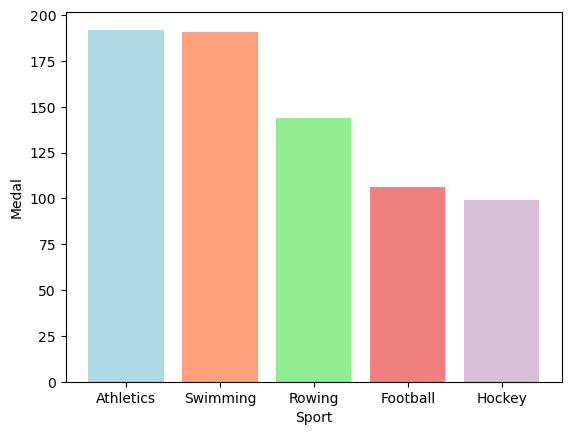

In [134]:
# Generate a bar plot of record counts corresponding to each of the top five sports.
import matplotlib.pyplot as plt


colors = ['lightblue', 'lightsalmon', 'lightgreen', 'lightcoral', 'thistle']

plt.bar(top_5_sport["Sport"], top_5_sport["Medal"], color=colors)

plt.xlabel("Sport")
plt.ylabel("Medal")

plt.show()


(array([  9.,   7.,  34.,  40.,  62., 110.,  60.,  62.,  44.,  63.,  90.,
         43.,  38.,  21.,  18.,  17.,   3.,   8.,   0.,   3.]),
 array([16. , 17.2, 18.4, 19.6, 20.8, 22. , 23.2, 24.4, 25.6, 26.8, 28. ,
        29.2, 30.4, 31.6, 32.8, 34. , 35.2, 36.4, 37.6, 38.8, 40. ]),
 <BarContainer object of 20 artists>)

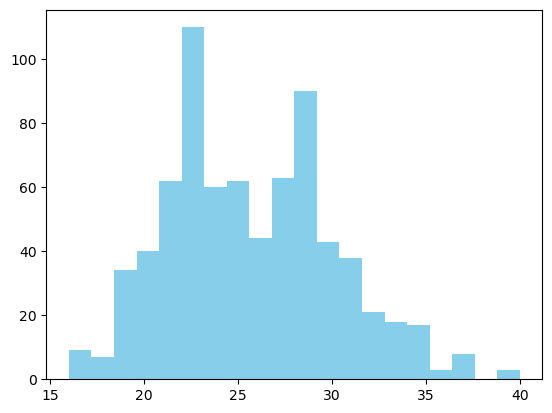

In [155]:
# Generate a histogram for the Age feature of all medal winners in the top five sports (2016).

top5_2016_medalcount_by_age = top5_2016.groupby("Age")["Medal"].count().reset_index()


top5_2016_medalcount_by_age

plt.hist(top5_2016_medalcount_by_age["Age"], bins=20, weights=top5_2016_medalcount_by_age["Medal"], color="skyblue")


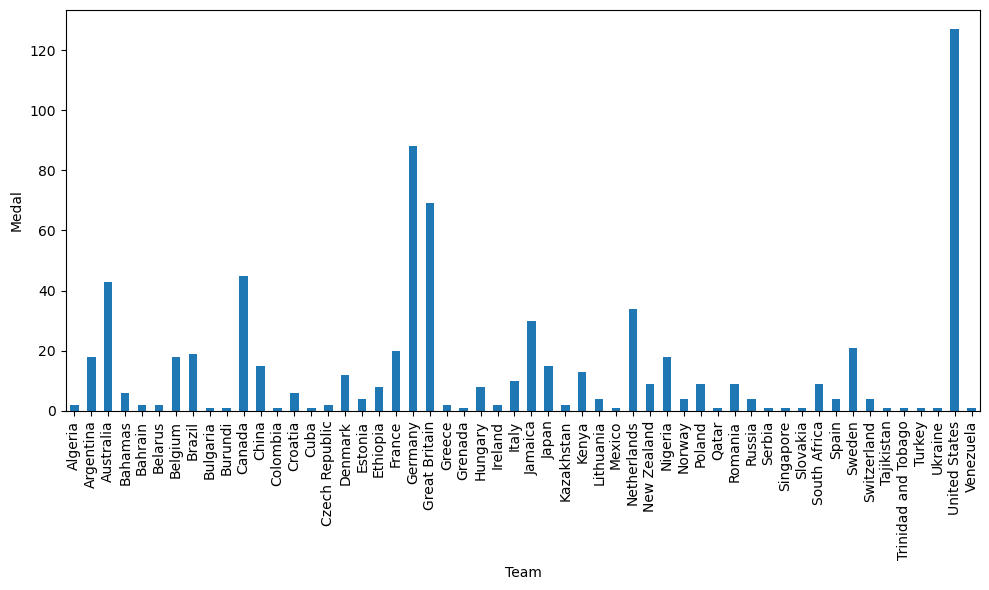

In [216]:

top5_2016_medalcount_by_team = top5_2016.groupby("Team")["Medal"].size()

# Plot a bar chart
plt.figure(figsize=(10, 6))
top5_2016_medalcount_by_team.plot(kind='bar', xlabel="Team", ylabel="Medal")

plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


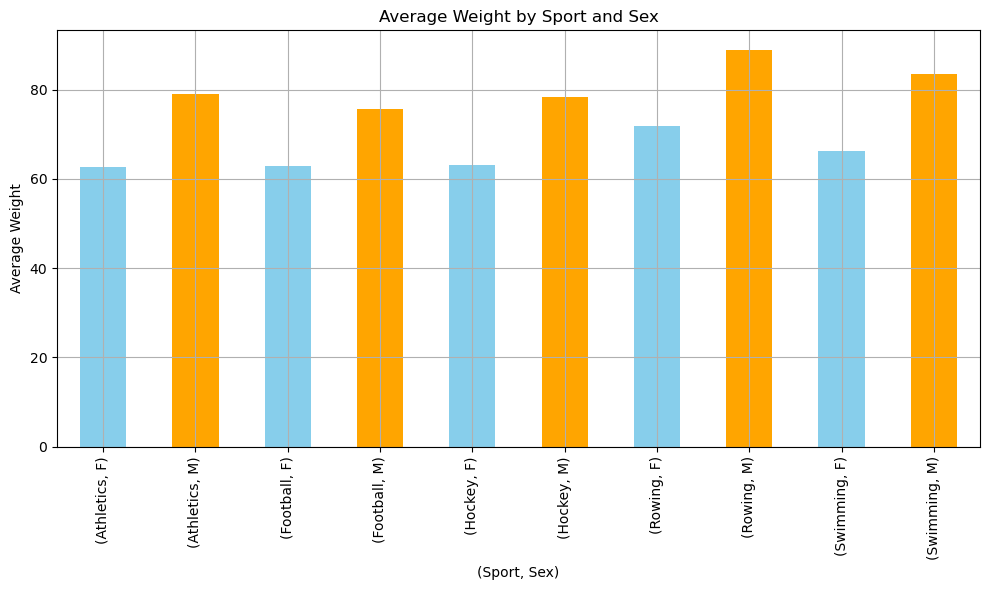

In [280]:
# Generate a bar plot indicating the average weight

data = top5_2016.groupby(["Sport", "Sex"])["Weight"].mean()

plt.figure(figsize=(10, 6))
data.plot(kind='bar', color=['skyblue', 'orange'], xlabel="(Sport, Sex)", ylabel="Average Weight")

# Add title and labels
plt.title('Average Weight by Sport and Sex')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

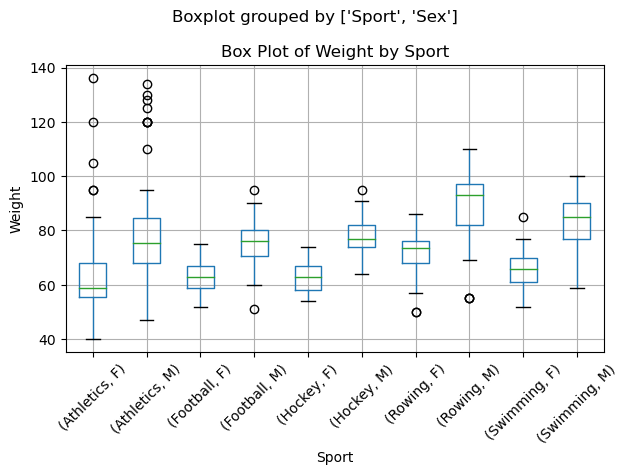

In [296]:
# Generate a bar plot indicating the average weight

data = {
  "Sport": top5_2016["Sport"],
  "Sex": top5_2016["Sex"],
  "Weight": top5_2016["Weight"],
}

df = pd.DataFrame(data)

# Create a box plot for each sport
plt.figure(figsize=(10, 6))
df.boxplot(column='Weight', by=['Sport', 'Sex'], xlabel="Sport", ylabel="Weight")

# Add title and labels
plt.title('Box Plot of Weight by Sport')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()



TypeError: 'str' object is not callable

<Figure size 1000x600 with 0 Axes>

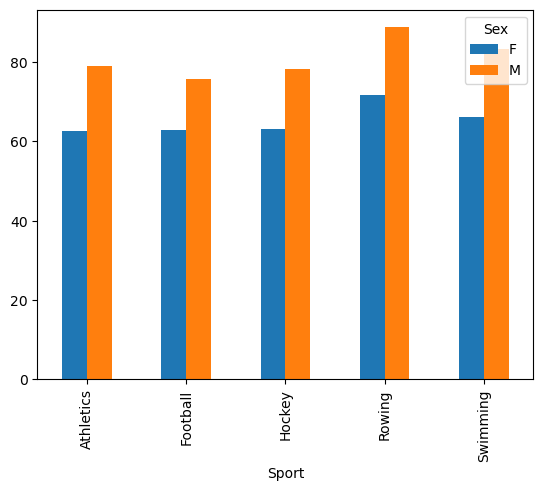

In [303]:
# Generate a bar plot indicating the average weight

data = {
    'Sport': ['Athletics', 'Athletics', 'Football', 'Football', 'Hockey', 'Hockey', 'Rowing', 'Rowing', 'Swimming', 'Swimming'],
    'Sex': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Weight': [62.578947, 79.074468, 62.962963, 75.725490, 63.061224, 78.380000, 71.766667, 88.833333, 66.195876, 83.408602]
}

# data = {
#   "Sport": top5_2016["Sport"],
#   "Sex": top5_2016["Sex"],
#   "Weight": top5_2016["Weight"],
# }

df = pd.DataFrame(data)

pivot_df = df.pivot(index='Sport', columns='Sex', values='Weight')

# Create a box plot for each sport
plt.figure(figsize=(10, 6))
pivot_df.plot(kind="bar", stacked=False)


# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

